In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter

import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix


In [11]:
# !pip install pmdarima

In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## USD-INR 

In [13]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

def read_stocks(file):
    stock_data = pd.read_csv(file, index_col='Date', parse_dates=['Date'], date_parser=dateparse) #.fillna(0)
    return stock_data

In [52]:
usd_inr = read_stocks("Datasets/USD-INR Exchange rate 2019_2021.csv") #, parse_dates=True, index_col=['Date'])
sbi = read_stocks("Datasets/SBI Share Prices 2019_2021.csv")
hdfc = read_stocks("Datasets/HDFC Bank Share Prices 2019_2021.csv")
icici = read_stocks("Datasets/ICICI Bank Share Prices 2019_2021.csv")
infosys = read_stocks("Datasets/Infosys Share Prices 2019_2021.csv")
cogni = read_stocks("Datasets/Cognizant share prices 2019_2021.csv")
hcl = read_stocks("Datasets/HCL Technologies share prices 2019_2021.csv")

In [55]:
icici

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,361.500000,364.799988,356.399994,363.750000,7759872.0
2019-01-02,361.500000,367.899994,360.299988,364.600006,18243156.0
2019-01-03,365.000000,367.299988,362.049988,363.250000,12884409.0
2019-01-04,361.850006,368.799988,358.049988,365.200012,22896026.0
2019-01-07,367.500000,371.000000,366.549988,367.700012,12719847.0
...,...,...,...,...,...
2021-09-27,724.500000,731.750000,722.299988,730.000000,7712240.0
2021-09-28,734.099976,735.400024,706.599976,717.150024,13491800.0
2021-09-29,707.349976,711.950012,701.299988,709.500000,11453404.0


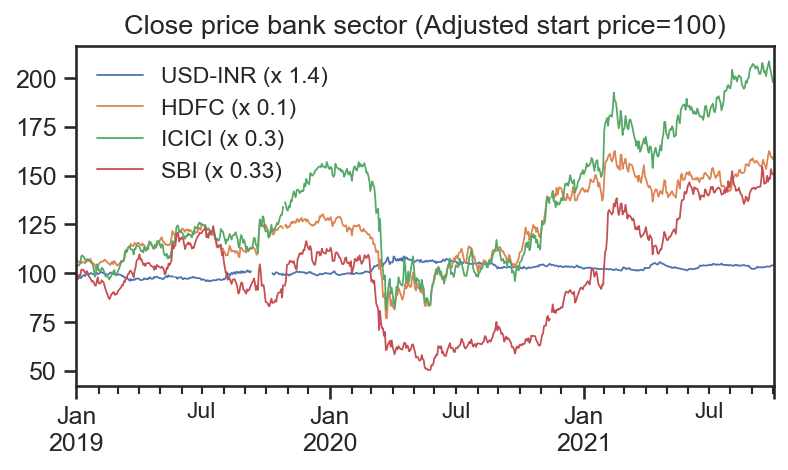

In [82]:
usd_inr['Close_Adjusted'] = usd_inr['Close']*1.4
usd_inr['Close_Adjusted'].plot(label="USD-INR (x 1.4)", figsize = (6,3),linewidth=0.85)
# sbi['Close'].plot(label="SBI")
hdfc['Close_Adjusted'] = hdfc['Close']/10
hdfc['Close_Adjusted'].plot(label='HDFC (x 0.1)',linewidth=0.85)
icici['Close_Adjusted'] = icici['Close']/3.5
icici['Close_Adjusted'].plot(label='ICICI (x 0.3)',linewidth=0.85)
sbi['Close_Adjusted'] = sbi['Close']/3
sbi['Close_Adjusted'].plot(label='SBI (x 0.33)',linewidth=0.85)
plt.yticks(rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),size =12, rotation=0)
plt.xticks(rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_yticklabels(),size =12, rotation=0)
plt.title("Close price bank sector (Adjusted start price=100)", fontsize=13)
plt.xlabel("")
plt.legend(frameon=False,fontsize=11)

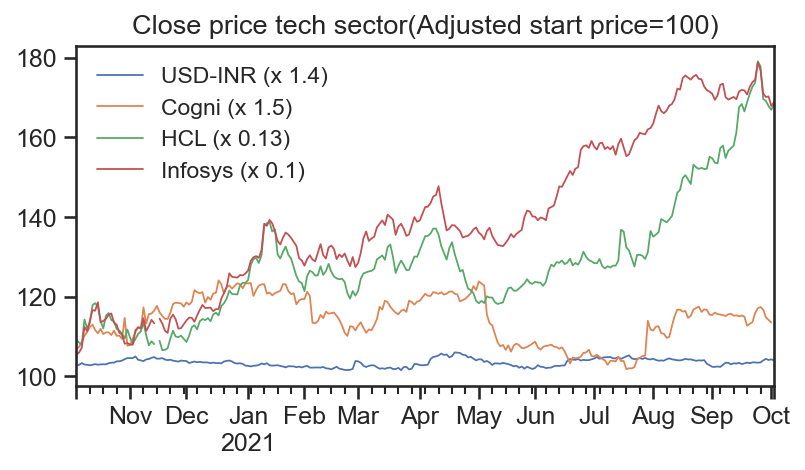

In [81]:
usd_inr['High_Adjusted'] = usd_inr['High']*1.4
usd_inr['High_Adjusted']['2020-10-05':].plot(label="USD-INR (x 1.4)",linewidth=0.85, figsize = (6,3))
cogni['High_Adjusted'] = cogni['High']*1.5
cogni['High_Adjusted']['2020-10-05':].plot(label='Cogni (x 1.5)',linewidth=0.85)
hcl['High_Adjusted'] = hcl['High']*0.13
hcl['High_Adjusted']['2020-10-05':].plot(label="HCL (x 0.13)",linewidth=0.85)
infosys['High_Adjusted'] = infosys['High']/10 #/3
infosys['High_Adjusted']['2020-10-05':].plot(label='Infosys (x 0.1)',linewidth=0.85)
plt.yticks(rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),size =12, rotation=0)
plt.xticks(rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_yticklabels(),size =12, rotation=0)
plt.title("Close price tech sector(Adjusted start price=100)", fontsize=13)
plt.xlabel("")
plt.legend(fontsize=11,frameon=False)

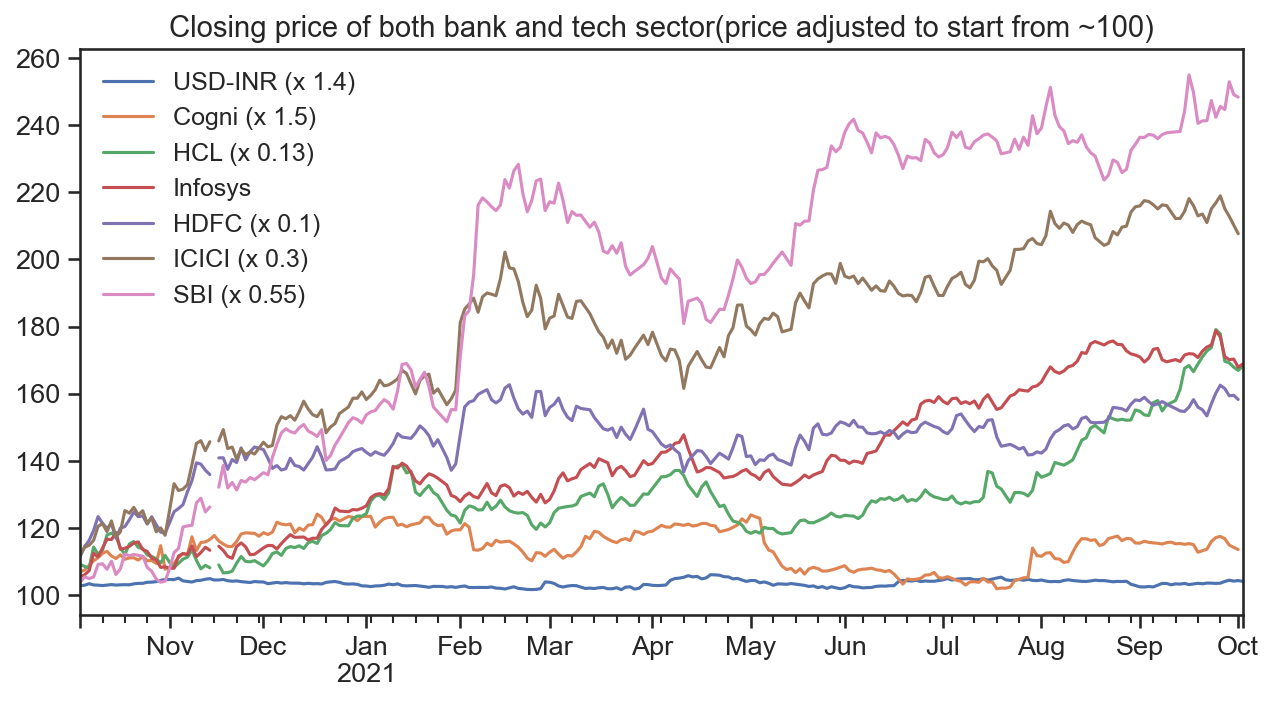

In [48]:
usd_inr['High_Adjusted'] = usd_inr['High']*1.4
usd_inr['High_Adjusted']['2020-10-05':].plot(label="USD-INR (x 1.4)", figsize = (10,5))
cogni['High_Adjusted'] = cogni['High']*1.5
cogni['High_Adjusted']['2020-10-05':].plot(label='Cogni (x 1.5)')
hcl['High_Adjusted'] = hcl['High'] *.13
hcl['High_Adjusted']['2020-10-05':].plot(label="HCL (x 0.13)")
infosys['High_Adjusted'] = infosys['High']/10 #/1.5 #/3
infosys['High_Adjusted']['2020-10-05':].plot(label='Infosys')

hdfc['Close_Adjusted'] = hdfc['Close']/10 #/3
hdfc['Close_Adjusted']['2020-10-05':].plot(label='HDFC (x 0.1)')
icici['Close_Adjusted'] = icici['Close']*.3
icici['Close_Adjusted']['2020-10-05':].plot(label='ICICI (x 0.3)')
# icici['Close']['2020-10-05':].plot(label="ICICI")
sbi['Close_Adjusted'] = sbi['Close']*.55
sbi['Close_Adjusted']['2020-10-05':].plot(label='SBI (x 0.55)')
plt.yticks(rotation=0, fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(),size =13, rotation=0)
plt.xticks(rotation=0, fontsize=13)
ax.set_xticklabels(ax.get_yticklabels(),size =13, rotation=0)
plt.title("Closing price of both bank and tech sector(price adjusted to start from ~100)",fontsize=14)
plt.xlabel("")
plt.legend(frameon=False, fontsize=12)

In [18]:
cogni['High_Adjusted']['2020-10-05':]

Date
2020-10-05    1068.900030
2020-10-06    1073.999970
2020-10-07    1087.200045
2020-10-08    1101.749955
2020-10-09    1110.899970
                 ...     
2021-09-27    1174.350015
2021-09-28    1167.450030
2021-09-29    1148.399970
2021-09-30    1141.949955
2021-10-01    1135.200000
Name: High_Adjusted, Length: 251, dtype: float64

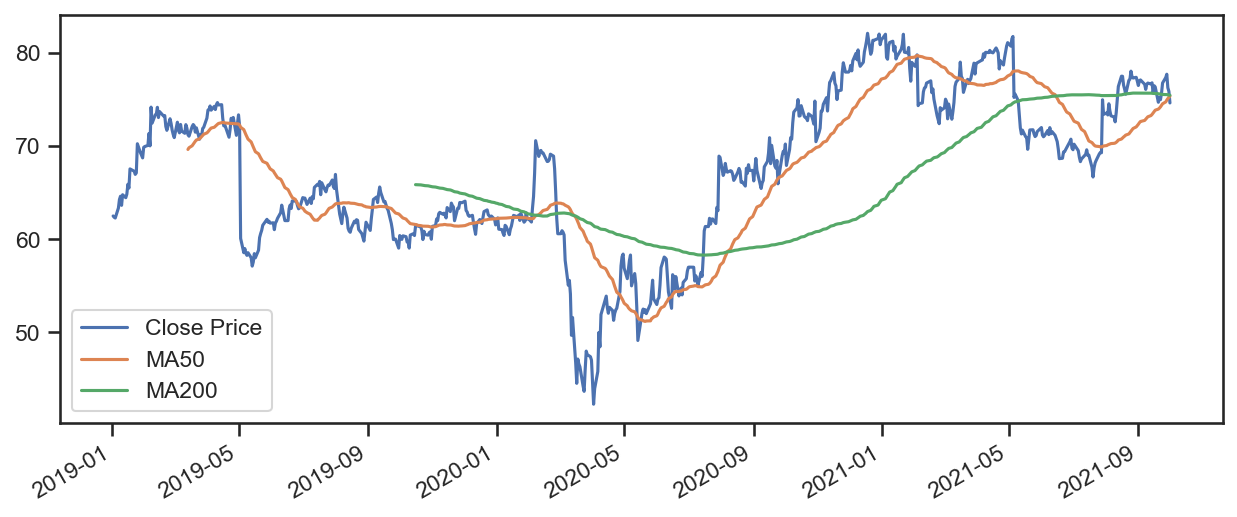

In [19]:

cogni['MA50'] = cogni['Close'].rolling(50).mean()
cogni['MA200'] = cogni['Close'].rolling(200).mean()
cogni['Open'].plot(label="Close Price",figsize = (10,4))
cogni['MA50'].plot(label="MA50")
cogni['MA200'].plot(label="MA200")
plt.xlabel("")
plt.legend()

Another strategy is to apply two moving averages to a chart: one longer and one shorter. When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a golden cross. Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a dead/death cross.
3

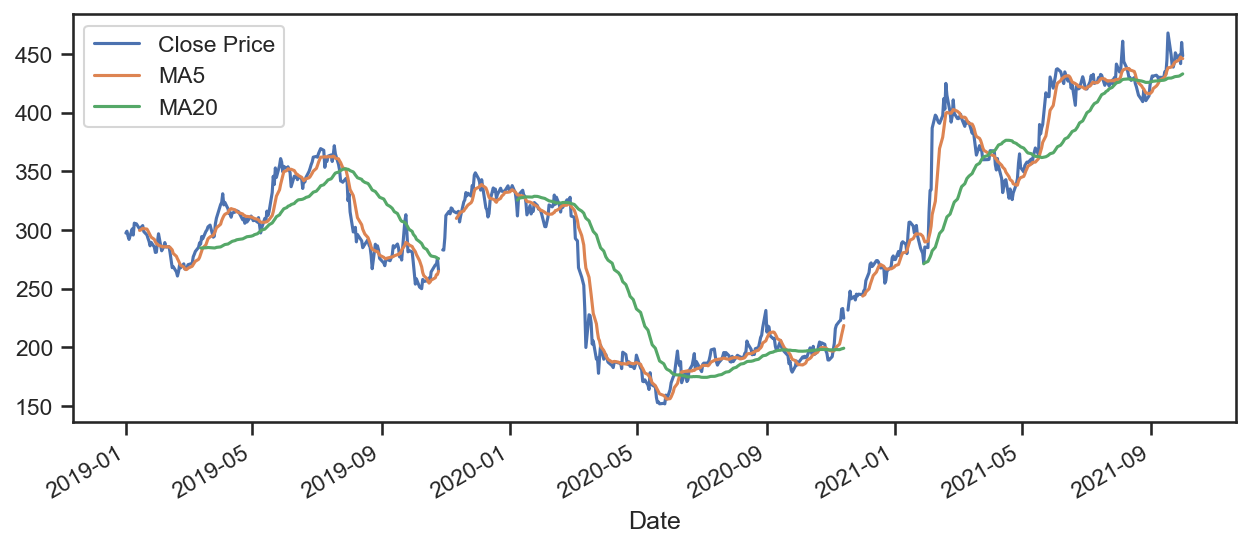

In [20]:
sbi['MA50'] = sbi['Close'].rolling(10).mean()
sbi['MA200'] = sbi['Close'].rolling(50).mean()
sbi['Open'].plot(label="Close Price",figsize = (10,4))
sbi['MA50'].plot(label="MA5")
sbi['MA200'].plot(label="MA20")
plt.legend()

array([[<AxesSubplot:xlabel='Cogni Open', ylabel='Cogni Open'>,
        <AxesSubplot:xlabel='HCL Open', ylabel='Cogni Open'>,
        <AxesSubplot:xlabel='Infosys Open', ylabel='Cogni Open'>],
       [<AxesSubplot:xlabel='Cogni Open', ylabel='HCL Open'>,
        <AxesSubplot:xlabel='HCL Open', ylabel='HCL Open'>,
        <AxesSubplot:xlabel='Infosys Open', ylabel='HCL Open'>],
       [<AxesSubplot:xlabel='Cogni Open', ylabel='Infosys Open'>,
        <AxesSubplot:xlabel='HCL Open', ylabel='Infosys Open'>,
        <AxesSubplot:xlabel='Infosys Open', ylabel='Infosys Open'>]],
      dtype=object)

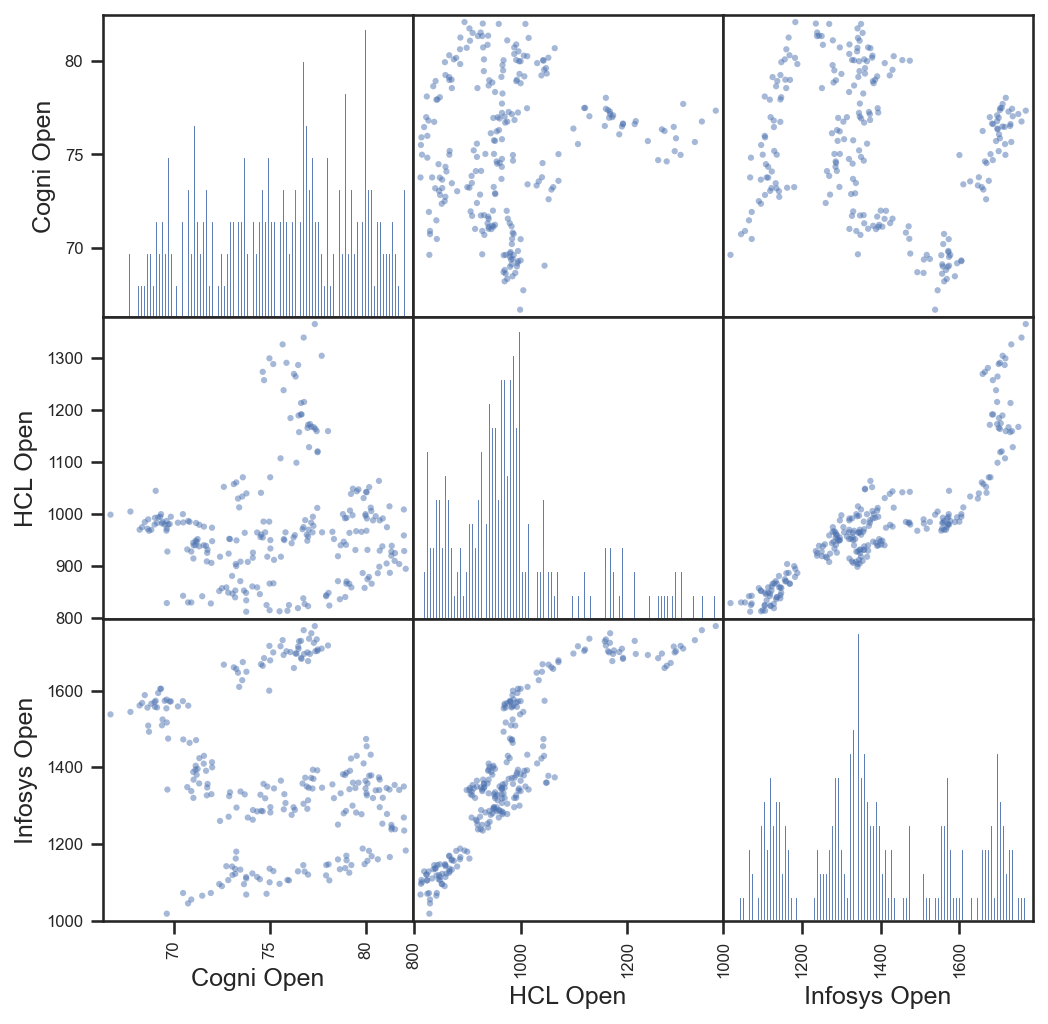

In [21]:
data = pd.concat([cogni['Open']['2020-10-05':], hcl['Open']['2020-10-05':], infosys['Open']['2020-10-05':]],axis = 1)
data.columns = ['Cogni Open','HCL Open','Infosys Open']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':100})

array([[<AxesSubplot:xlabel='HDFCOpen', ylabel='HDFCOpen'>,
        <AxesSubplot:xlabel='ICICIOpen', ylabel='HDFCOpen'>,
        <AxesSubplot:xlabel='SBIOpen', ylabel='HDFCOpen'>],
       [<AxesSubplot:xlabel='HDFCOpen', ylabel='ICICIOpen'>,
        <AxesSubplot:xlabel='ICICIOpen', ylabel='ICICIOpen'>,
        <AxesSubplot:xlabel='SBIOpen', ylabel='ICICIOpen'>],
       [<AxesSubplot:xlabel='HDFCOpen', ylabel='SBIOpen'>,
        <AxesSubplot:xlabel='ICICIOpen', ylabel='SBIOpen'>,
        <AxesSubplot:xlabel='SBIOpen', ylabel='SBIOpen'>]], dtype=object)

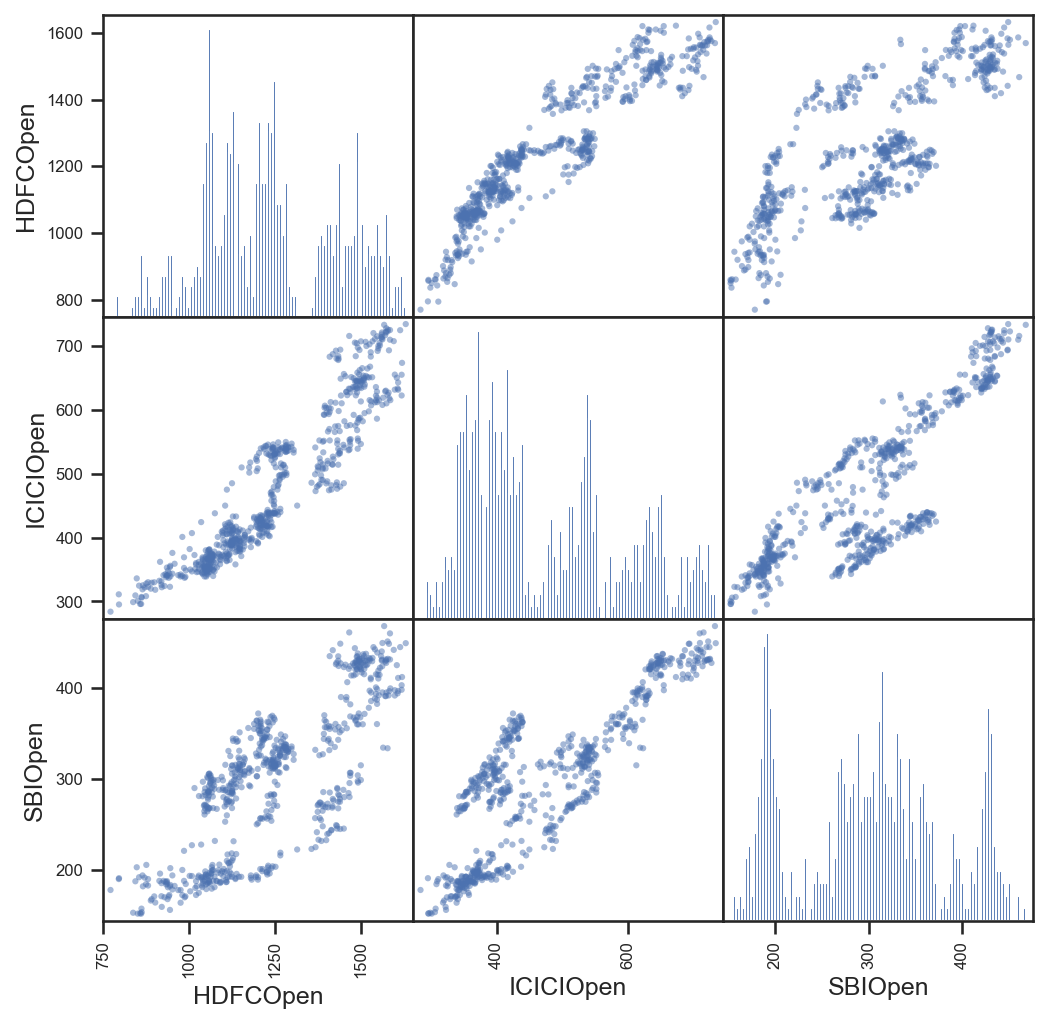

In [22]:
data = pd.concat([hdfc['Open'],icici['Open'],sbi['Open']],axis = 1)
data.columns = ['HDFCOpen','ICICIOpen','SBIOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':100})

In [23]:
# def volatility(company):
#     company['Log returns'] = np.log(company['Close']/company['Close'].shift())
#     volatility = company['Log returns'].std()*250**.5
#     str_vol = str(round(volatility, 4)*100)

#     fig, ax = plt.subplots()
#     company['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
#     ax.set_xlabel("Log return")
#     ax.set_ylabel("Freq of log return")
#     ax.set_title(f"{company} volatility: " + str_vol + "%")
# #     plt.show()

In [24]:
def volatality_score(company):
    company['Log returns'] = np.log(company['Close']/company['Close'].shift())
    volatility = company['Log returns'].std()*250**.5
    str_vol = str(round(volatility, 4)*100)
    print("Volatility: " + str_vol + "%")


In [25]:
# icici['Log returns'] = np.log(icici['Close']/icici['Close'].shift())
# volatility = icici['Log returns'].std()*250**.5
# str_vol = str(round(volatility, 4)*100)
# volatality_score(icici)

# fig, ax = plt.subplots()
# icici['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
# ax.set_xlabel("Log return")
# ax.set_ylabel("Freq of log return")
# ax.set_title("ICICI volatility: " + str_vol + "%")

Volatility: 40.18%
Volatility: 30.630000000000003%
Volatility: 40.26%
Volatility: 34.56%
Volatility: 21.560000000000002%
Volatility: 26.63%


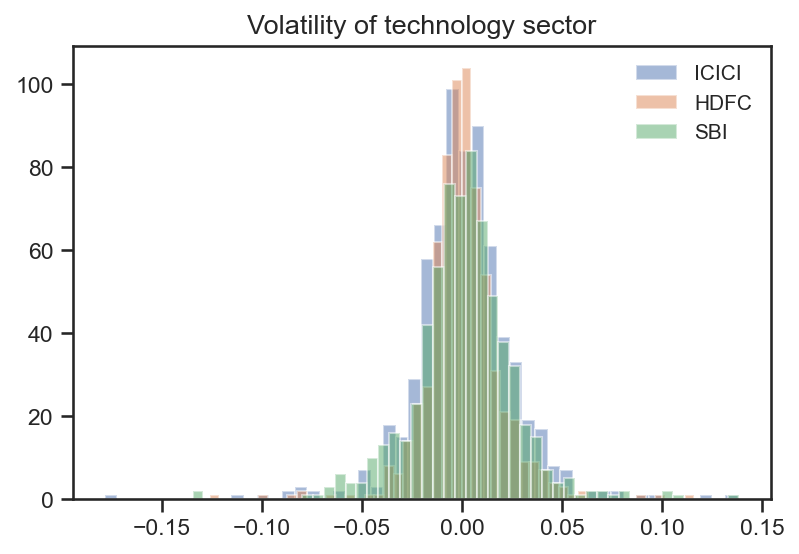

In [29]:
#Volatility
volatality_score(icici)
volatality_score(hdfc)
volatality_score(sbi)
volatality_score(cogni)
volatality_score(infosys)
volatality_score(hcl)

icici['returns'] = (icici['Close']/icici['Close'].shift(1))-1
hdfc['returns'] = (hdfc['Close']/hdfc['Close'].shift(1)) - 1
sbi['returns'] = (sbi['Close']/sbi['Close'].shift(1)) -1
icici['returns'].hist(bins = 50, label = 'ICICI', alpha = 0.5)
hdfc['returns'].hist(bins = 50, label = 'HDFC', alpha = 0.5)
sbi['returns'].hist(bins = 50, label = 'SBI', alpha = 0.5, figsize = (6,4))
plt.grid(False)
plt.title("Volatility of technology sector",fontsize=13)
plt.legend(fontsize=10, frameon=False)

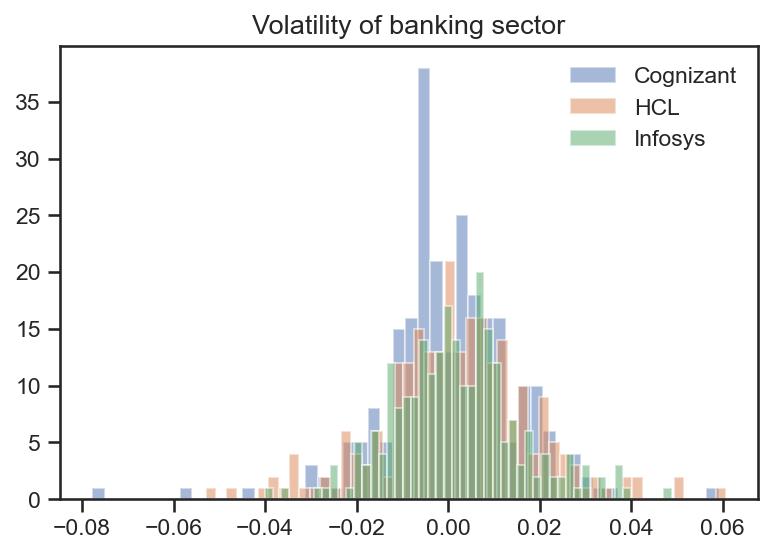

In [28]:
#Volatility
cogni['returns'] = (cogni['Close']['2020-10-05':]/cogni['Close']['2020-10-05':].shift(1)) -1
hcl['returns'] = (hcl['Close']/hcl['Close'].shift(1))-1
infosys['returns'] = (infosys['Close']/infosys['Close'].shift(1)) - 1
cogni['returns']['2020-10-05':].hist(bins = 50, label = 'Cognizant', alpha = 0.5, figsize = (6,4))
hcl['returns'].hist(bins = 50, label = 'HCL', alpha = 0.5)
infosys['returns'].hist(bins = 50, label = 'Infosys', alpha = 0.5)
plt.grid(False)
plt.title("Volatility of banking sector", fontsize=13)
plt.legend(frameon=False)

In [131]:
infosys.dropna(inplace=True)

<Figure size 1500x900 with 0 Axes>

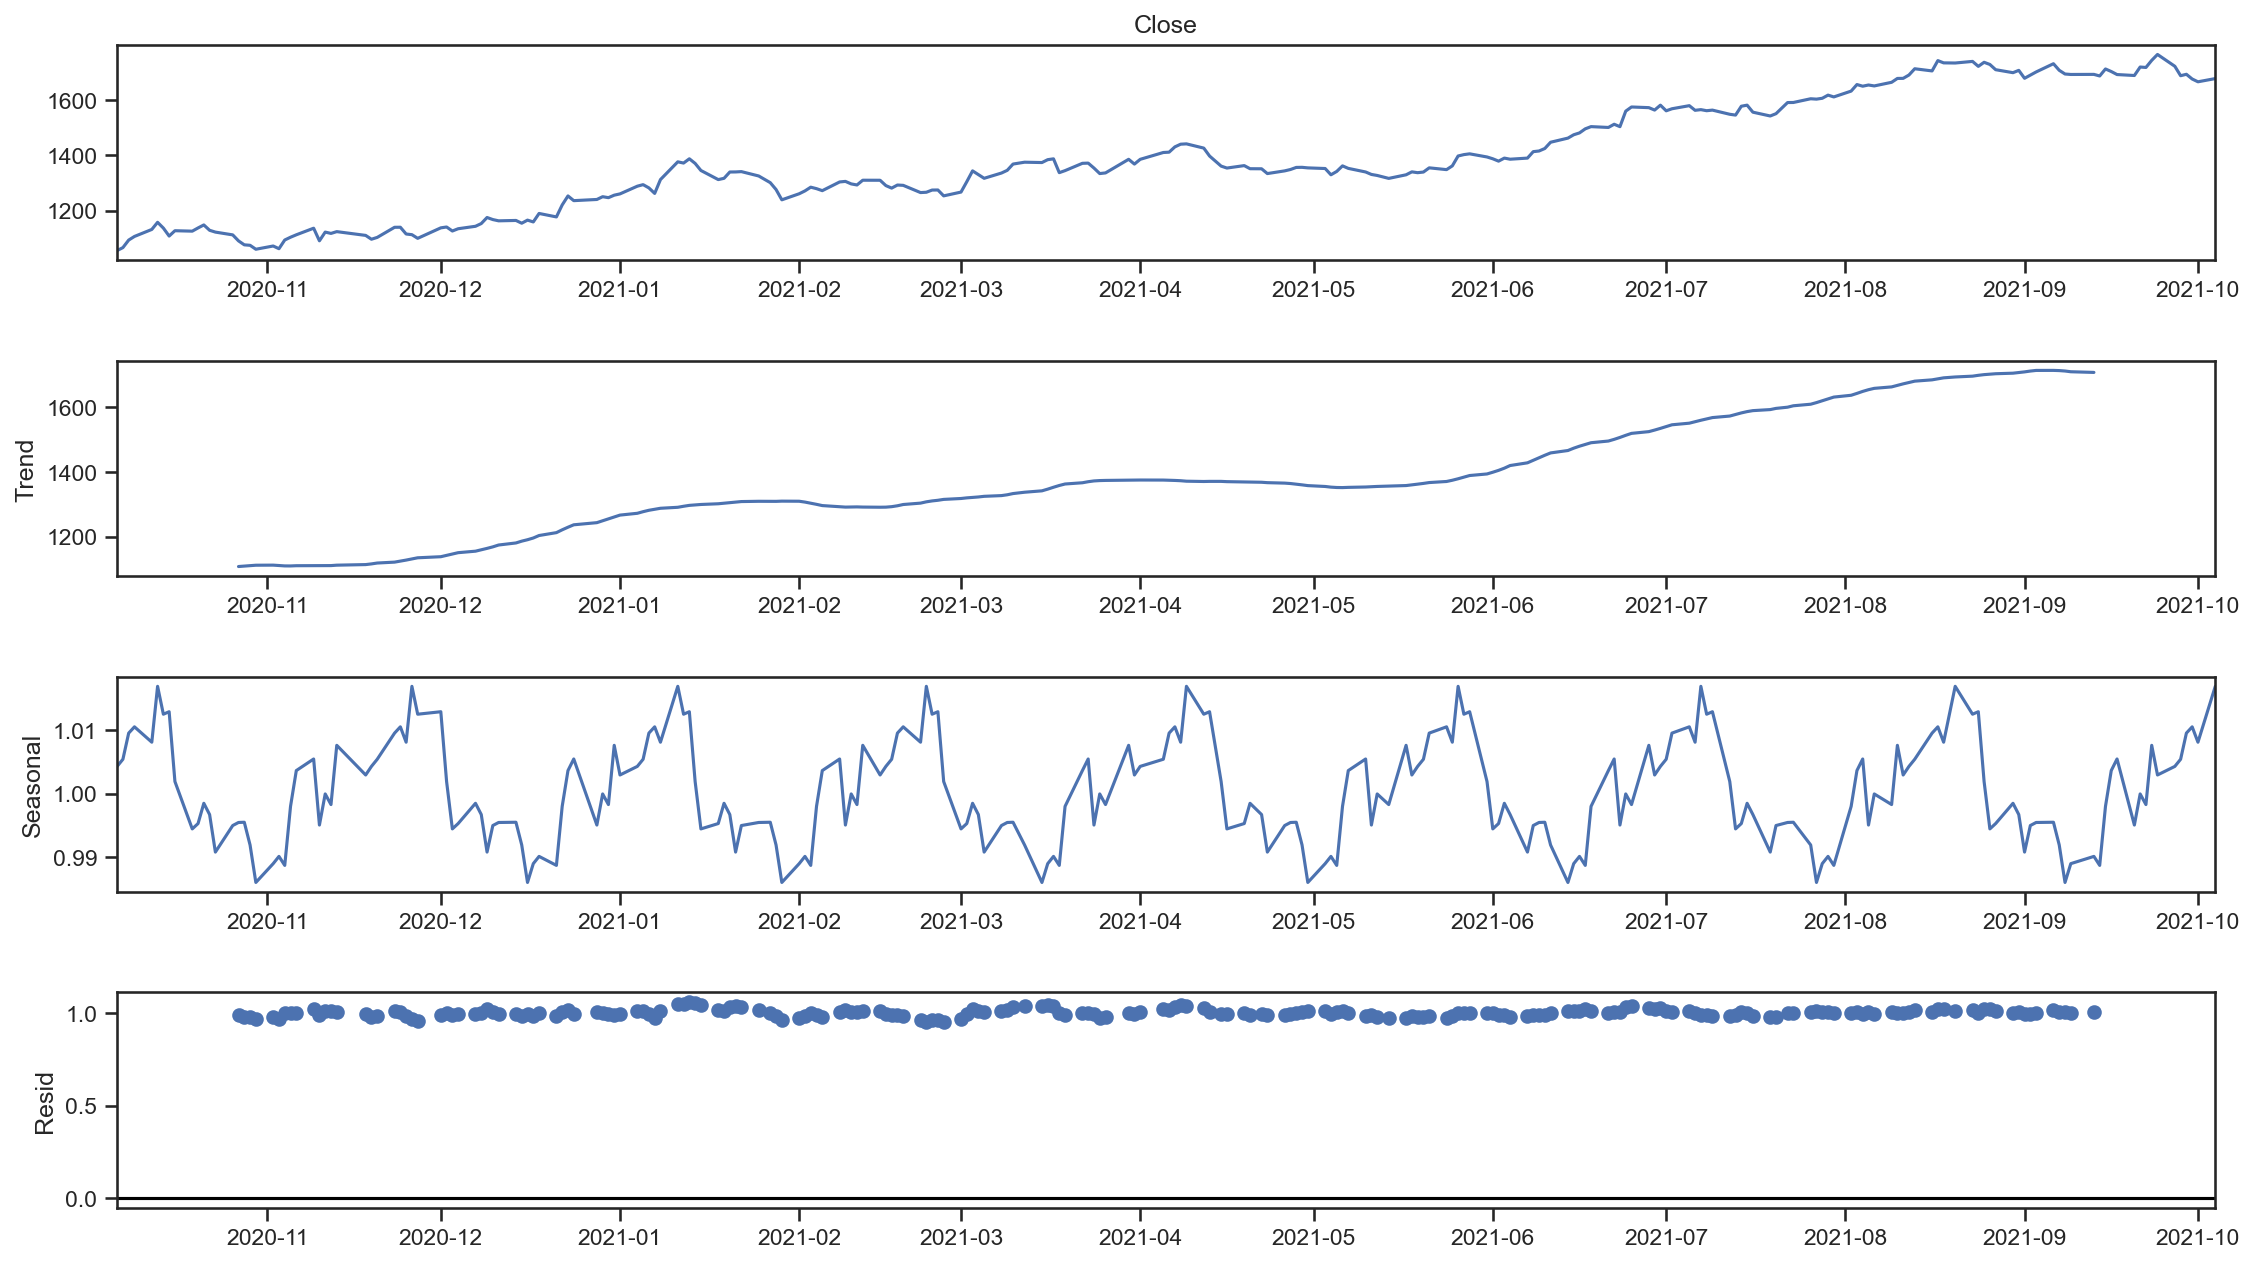

In [132]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(infosys['Close'], model='multiplicative', period= 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


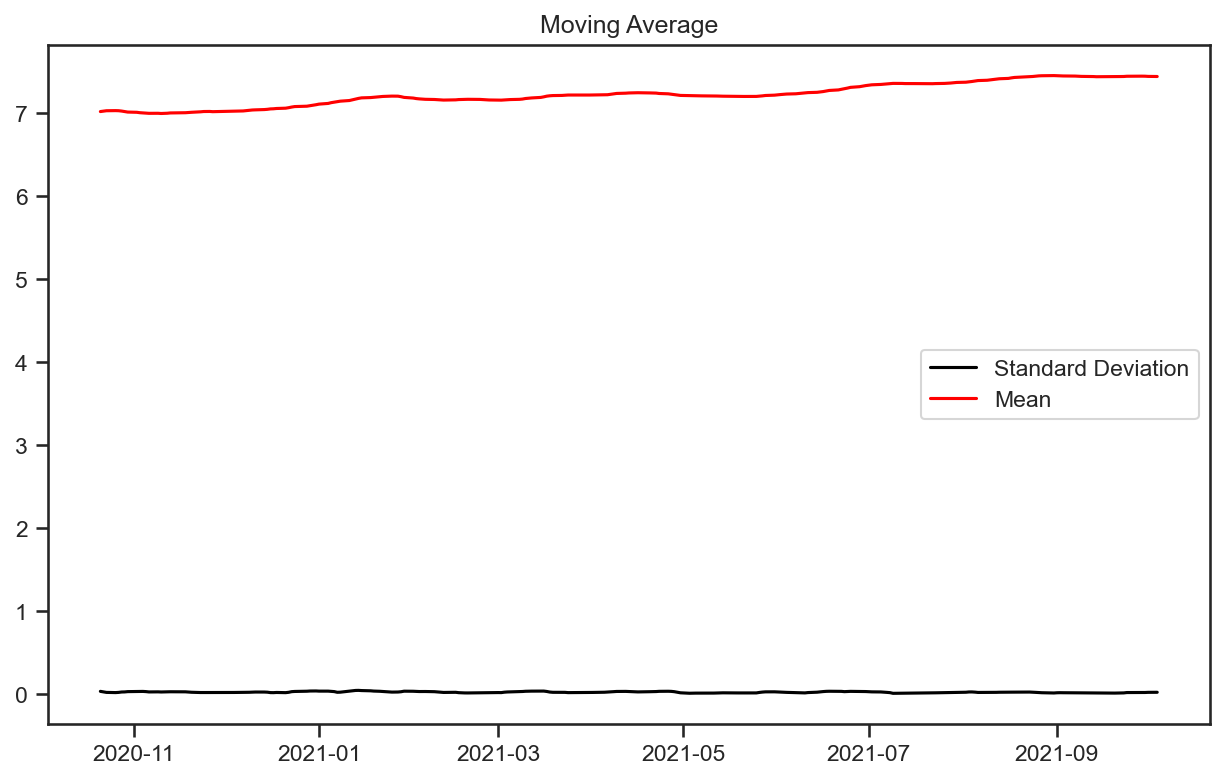

In [133]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(infosys['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

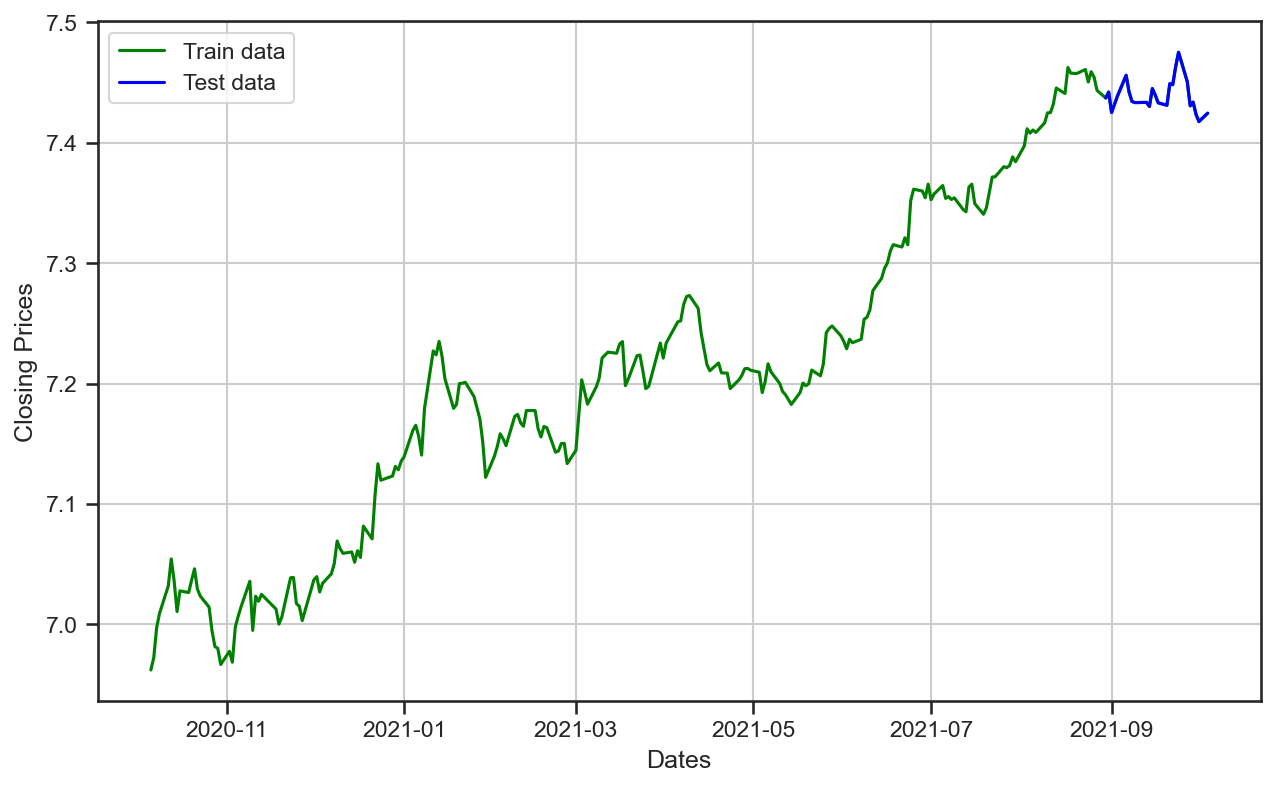

In [134]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1238.235, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1236.744, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1236.896, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1235.735, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1234.987, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.784 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 621.118
Date:                Thu, 10 Nov 2022   AIC                          -1238.235
Time:                        16:20:27   BIC                          -1231.475
Sample:                             0   HQIC                         -1235.505
                                - 218                                  

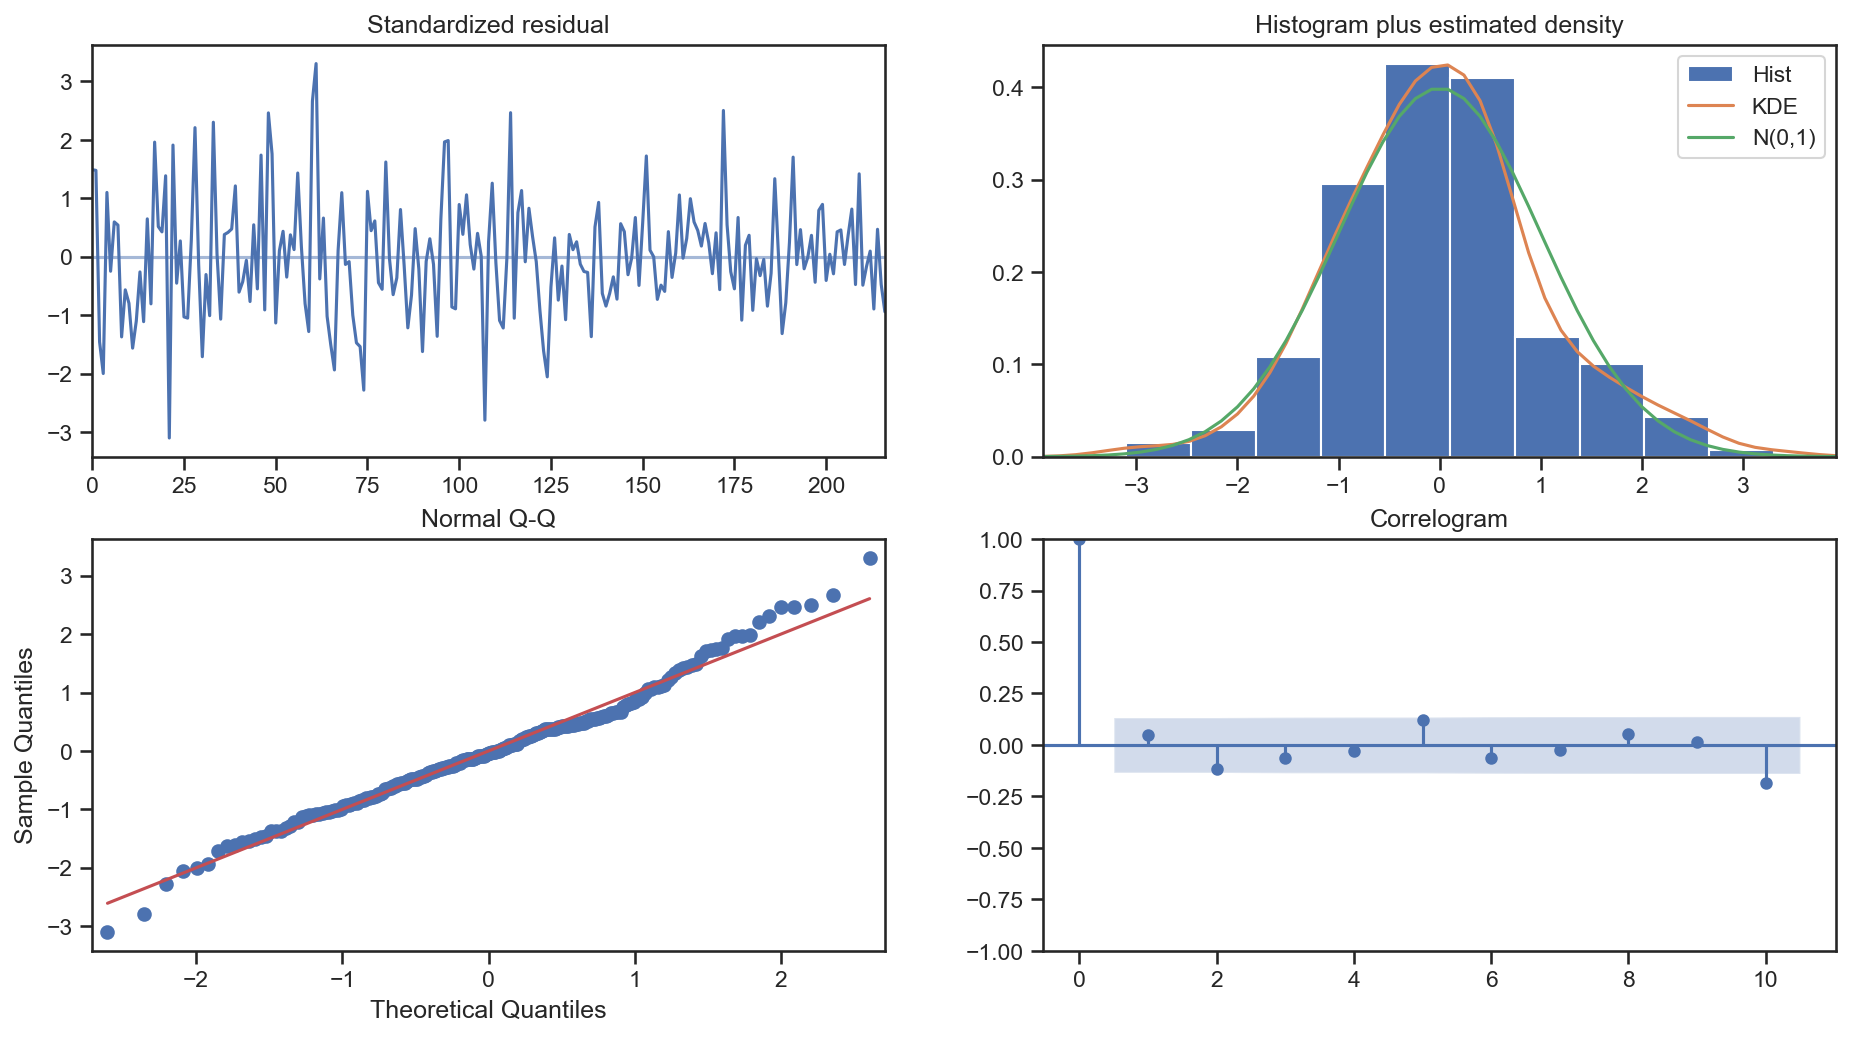

In [135]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [137]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  218
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 620.462
Date:                Thu, 10 Nov 2022   AIC                          -1232.925
Time:                        16:21:52   BIC                          -1219.405
Sample:                             0   HQIC                         -1227.464
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1547      0.748      0.207      0.836      -1.311       1.621
ma.L1         -0.0828      0.743     -0.111      0.911      -1.540       1.374
ma.L2         -0.1074      0.079     -1.360      0.1

In [150]:
mod = SARIMAX(train_data, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  218
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 619.180
Date:                Thu, 10 Nov 2022   AIC                          -1232.359
Time:                        16:46:54   BIC                          -1222.206
Sample:                             0   HQIC                         -1228.258
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0216      0.057      0.378      0.706      -0.091       0.134
ar.L1          0.9970      0.008    125.228      0.000       0.981       1.013
sigma2         0.0002    1.6e-05     12.196      0.0

In [140]:
fc, se, conf = fitted.forecast(321, alpha=0.05)  # 95% conf

ValueError: not enough values to unpack (expected 3, got 1)

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide/notebook

In [ ]:
def plot_closing(df):
    df['Close'].plot()
    
plot_closing(usd_inr)
plot_closing(sbi)
plot_closing(icici)
plot_closing(hdfc)

plot_closing(infosys)
plot_closing(hcl)
plt.legend()

In [ ]:
# plot_closing(usd_inr)
# plot_closing(cogni)
plot_closing(infosys)
plot_closing(hcl)

In [ ]:
infosys

In [ ]:
df1 = pd.read_csv("Datasets/Cognizant share prices 2019_2021.csv", parse_dates=True,squeeze=True, index_col=['Date'])
df1

In [ ]:
df['Close'].plot()  # Dollar 
df1['Close'].plot() # Cognizant
df2['Close_Adjusted'] = df2['Close']/4
df2['Close_Adjusted'] .plot()


In [ ]:
df1 = pd.read_csv("Datasets/Cognizant share prices 2019_2021.csv", parse_dates=True,squeeze=True, index_col=['Date'])
df1

In [ ]:
# df1.iloc[70:100]

In [ ]:
df2 = pd.read_csv("Datasets/SBI Share Prices 2019_2021.csv", parse_dates=True,squeeze=True, index_col=['Date'])
df2

In [ ]:
df3 = pd.read_csv("Datasets/HDFC Bank Share Prices 2019_2021.csv", parse_dates=True,squeeze=True, index_col=['Date'])
df3

In [ ]:
df3['Close'].plot()

In [ ]:
df2['Normalized_Volume'] = df2['Volume']/1000000
df2['Normalized_Volume'].plot()    # df2['Volume'].plot()
df['Close'].plot()
# df['Open'].plot()

In [ ]:
df[['Open','Close','High']].plot()
df1

In [ ]:
def rollingwindow(days,df):
    data=df.filter(['Date','Open','High','Low','Close'],axis=1)
    data.set_index('Date', inplace=True)
    rolling_data=data.rolling(window=days).mean().shift()
    return rolling_data.dropna()

In [ ]:
def WeekMovingAvg(weeks, df):
    dateclose_data = pd.DataFrame({'Date': df['Date'], 'Close':df['Close']})
    dateclose_data.set_index('Date', inplace=True)
    days = weeks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
    dateclose_data['Movingavg'] = dateclose_data['Close'].rolling(window=days).mean().shift()
    return dateclose_data.dropna()

In [ ]:
WeekMovingAvg(10,df).plot()

In [ ]:
rollingwindow(52, data)